# Naive Bayes:

Naive Bayes is a probabilistic machine learning algorithm used for classification tasks. 
 - It's based on Bayes' theorem, which calculates the probability of a certain event happening given the probability of another related event. 
 - The "naive" assumption in Naive Bayes is that features are independent of each other, even though this might not hold in reality. It's particularly effective for text classification and spam filtering. 
 - By learning from labeled training data, Naive Bayes calculates the likelihood of specific features belonging to each class and then predicts the class with the highest probability. 
 
Despite its simplifying assumptions, Naive Bayes often performs surprisingly well, is computationally efficient, and serves as a baseline model for many classification problems.

Gaussian Naive Bayes assumes that features follow a Gaussian (normal) distribution, which might not be the best fit for text data.

### Importing Libraries & Dataset:

In [1]:
import numpy as np
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df['Category'] = df['Category'].apply(lambda x:1 if x == 'spam' else 0)
df.drop_duplicates(inplace = True)

# Column that only has words & space.
words = []
for i in df['Message']:
    i = i.lower()
    i = re.sub("[^a-z0-9 ]", '', i)
# Removing everything except space & a-z.
    words.append(i)

df['Words'] = words
df.head()

,Category,Message,Words
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


## Case I: Multinomial Naive Bayes:

Multinomial Naive Bayes is a variant of the Naive Bayes algorithm that is specifically designed for text classification problems, making it a good fit for tasks like email spam classification. It works well with discrete data, such as word counts or term frequencies commonly found in text data.

### Model Building:

In [3]:
X = df['Words']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
cv = CountVectorizer(binary = True)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(3867, 7952)
(1290, 7952)


In [4]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [5]:
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round((accuracy)*100, 2)} %\n")
print('Classification Report:\n')
print(classification_report(y_test, y_pred))

Accuracy: 97.91 %

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1138
           1       0.97      0.85      0.91       152

    accuracy                           0.98      1290
   macro avg       0.98      0.92      0.95      1290
weighted avg       0.98      0.98      0.98      1290



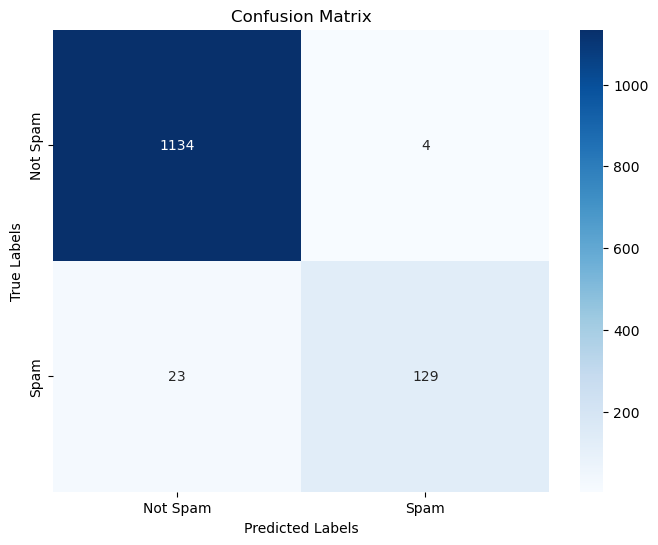

In [6]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], 
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Case II: Multinomial Naive Bayes with Pipeline:
A pipeline combines multiple preprocessing and modeling steps into a single object. It automatically handles the transformation of data from one step to another. This makes the code more compact, reduces the risk of errors, and enhances code readability. Pipelines are particularly useful when you have a more complex workflow involving multiple steps.

In [7]:
df = pd.read_csv('spam.csv')

df['Category'] = df['Category'].apply(lambda x:1 if x == 'spam' else 0)
df.drop_duplicates(inplace = True)

# Column that only has words & space.
words = []
for i in df['Message']:
    i = i.lower()
    i = re.sub("[^a-z0-9 ]", '', i)
# Removing everything except space & a-z.
    words.append(i)

df['Words'] = words
df.head()

,Category,Message,Words
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [8]:
X = df['Words']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
clf = Pipeline([('vectorizer', CountVectorizer(binary = True)), ('classifier', MultinomialNB())])
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(binary=True)),
                ('classifier', MultinomialNB())])

In [9]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round((accuracy)*100, 2)} %\n")
print('Classification Report:\n')
print(classification_report(y_test, y_pred))

Accuracy: 98.37 %

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1124
           1       0.97      0.90      0.93       166

    accuracy                           0.98      1290
   macro avg       0.98      0.95      0.96      1290
weighted avg       0.98      0.98      0.98      1290



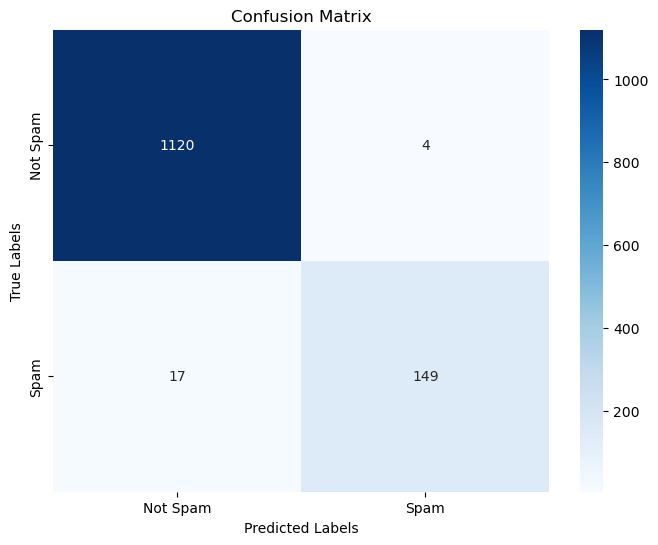

In [10]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], 
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Case III: Bernoulli Naive Bayes:

Bernoulli Naive Bayes can be used for email spam classification and is a popular choice for this task. In email spam classification, the data is often represented as a binary bag-of-words or binary term frequency vector, where each feature indicates the presence or absence of a particular word in the email. Since Bernoulli Naive Bayes is designed for binary features, it's well-suited for this type of data representation.

In [11]:
df = pd.read_csv('spam.csv')

df['Category'] = df['Category'].apply(lambda x:1 if x == 'spam' else 0)
df.drop_duplicates(inplace = True)

# Column that only has words & space.
words = []
for i in df['Message']:
    i = i.lower()
    i = re.sub("[^a-z0-9 ]", '', i)
# Removing everything except space & a-z.
    words.append(i)

df['Words'] = words
df.head()

,Category,Message,Words
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [12]:
X = df['Words']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
cv = CountVectorizer(binary = True)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(3867, 8050)
(1290, 8050)


In [13]:
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round((accuracy)*100, 2)} %\n")
print('Classification Report:\n')
print(classification_report(y_test, y_pred))

Accuracy: 96.51 %

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1137
           1       0.99      0.71      0.83       153

    accuracy                           0.97      1290
   macro avg       0.98      0.86      0.90      1290
weighted avg       0.97      0.97      0.96      1290



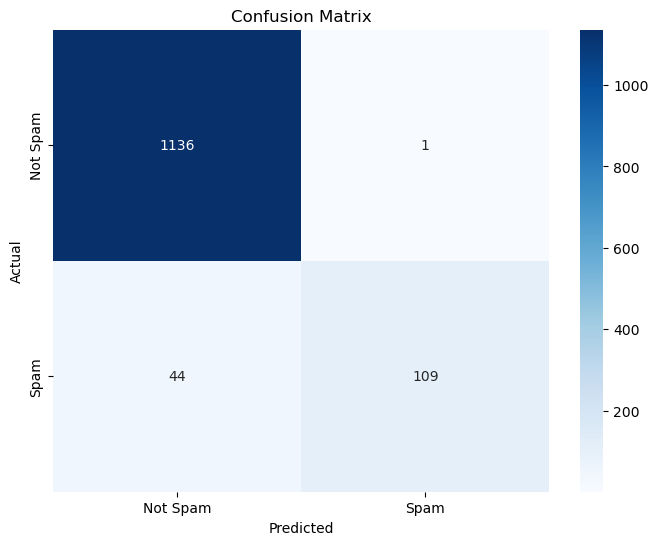

In [15]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Case IV: Bernoulli Naive Bayes with Pipeline:

In [16]:
df = pd.read_csv('spam.csv')

df['Category'] = df['Category'].apply(lambda x:1 if x == 'spam' else 0)
df.drop_duplicates(inplace = True)

# Column that only has words & space.
words = []
for i in df['Message']:
    i = i.lower()
    i = re.sub("[^a-z0-9 ]", '', i)
# Removing everything except space & a-z.
    words.append(i)

df['Words'] = words
df.head()

,Category,Message,Words
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [17]:
X = df['Words']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
clf = Pipeline([('vectorizer', CountVectorizer(binary = True)), ('classifier', BernoulliNB())])
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(binary=True)),
                ('classifier', BernoulliNB())])

In [18]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round((accuracy)*100, 2)} %\n")
print('Classification Report:\n')
print(classification_report(y_test, y_pred))

Accuracy: 96.59 %

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1125
           1       1.00      0.73      0.85       165

    accuracy                           0.97      1290
   macro avg       0.98      0.87      0.91      1290
weighted avg       0.97      0.97      0.96      1290



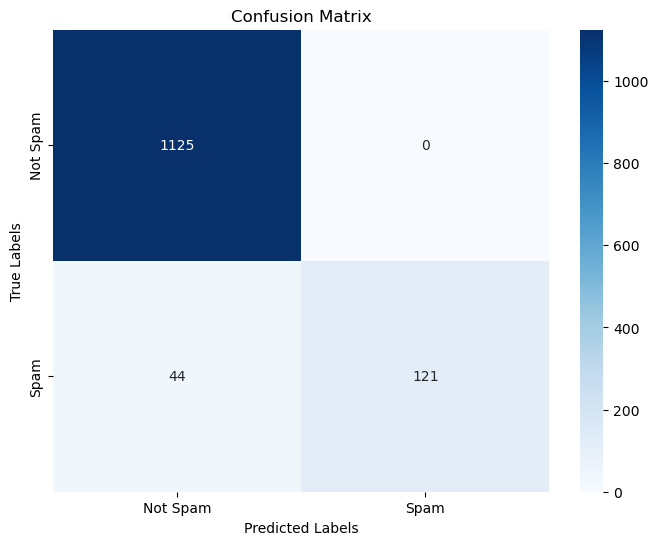

In [19]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], 
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()